In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# импортируем библиотечные функции -- прямое и обратное быстрое преобразование Фурье
from scipy.fft import fft, ifft

In [ ]:
N = 8
m = -3
k = np.array(range(8))
x_k = np.array([1, -6, 8, -4, 0, -7, 4, -9])

assert np.shape(x_k)[0] == N

## Task 2.1 and 2.2

Пусть $x[k]$ -- дискретный сигнал, тогда дискретное преобразование Фурье (далее ДПФ) запишется следующим образом

$$X[n] = \sum \limits_{k=0}^{N-1} x[k] \exp \left(-j \frac{2 \pi}{N} n k \right)$$

ДПФ можно записать в матричной форме:

$$X = W x$$

где $W$ -- матрица размерности $N \times N$, такая, что $W_N^{kn} = \exp \left(-j \frac{2 \pi}{N} n k \right)$

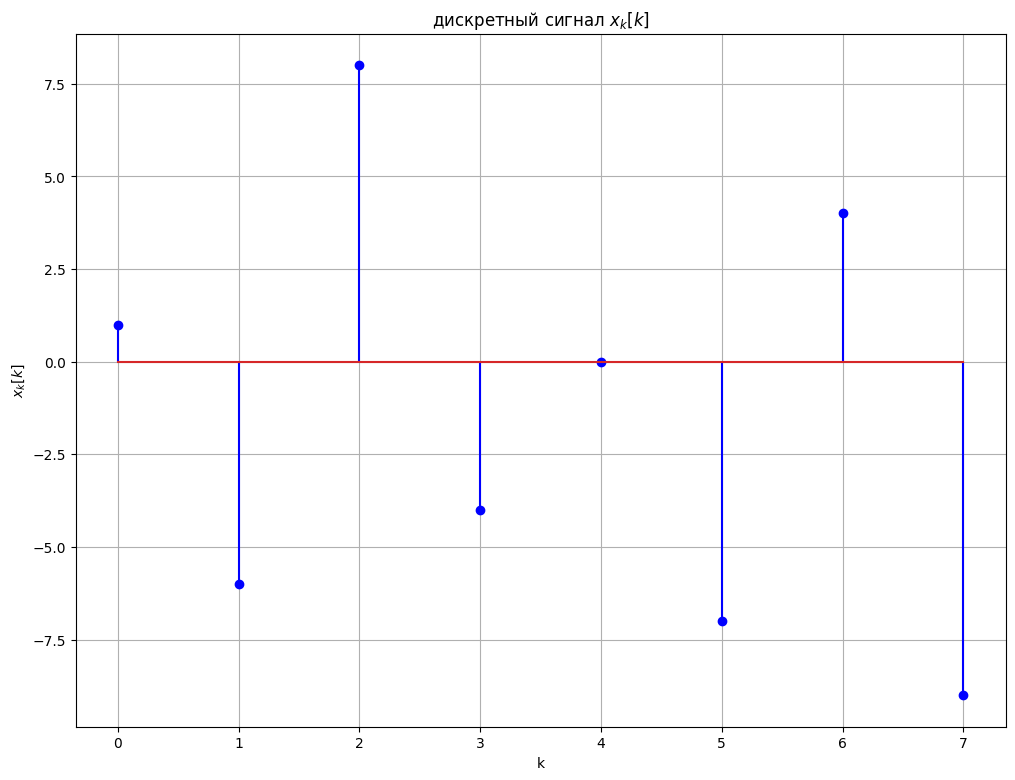

In [ ]:
plt.figure(figsize=(12, 9))

plt.stem(k, x_k, linefmt='b', markerfmt='bo')

plt.title(r'дискретный сигнал $x_k[k]$')
plt.xlabel('k')
plt.ylabel(r'$x_k[k]$')
plt.grid()

#### ДПФ полученное матричным способом

In [ ]:
#построим матрицу дискретного преобразования Фурье
W = np.full((N, N), 0.0 + 0.0j)

for n in range(N):
   for k in range(N):
     W[n][k] = np.exp(-1j * 2*math.pi/N * n*k)

# print(W)

n = np.array(range(8))
X_n = np.dot(W, x_k)

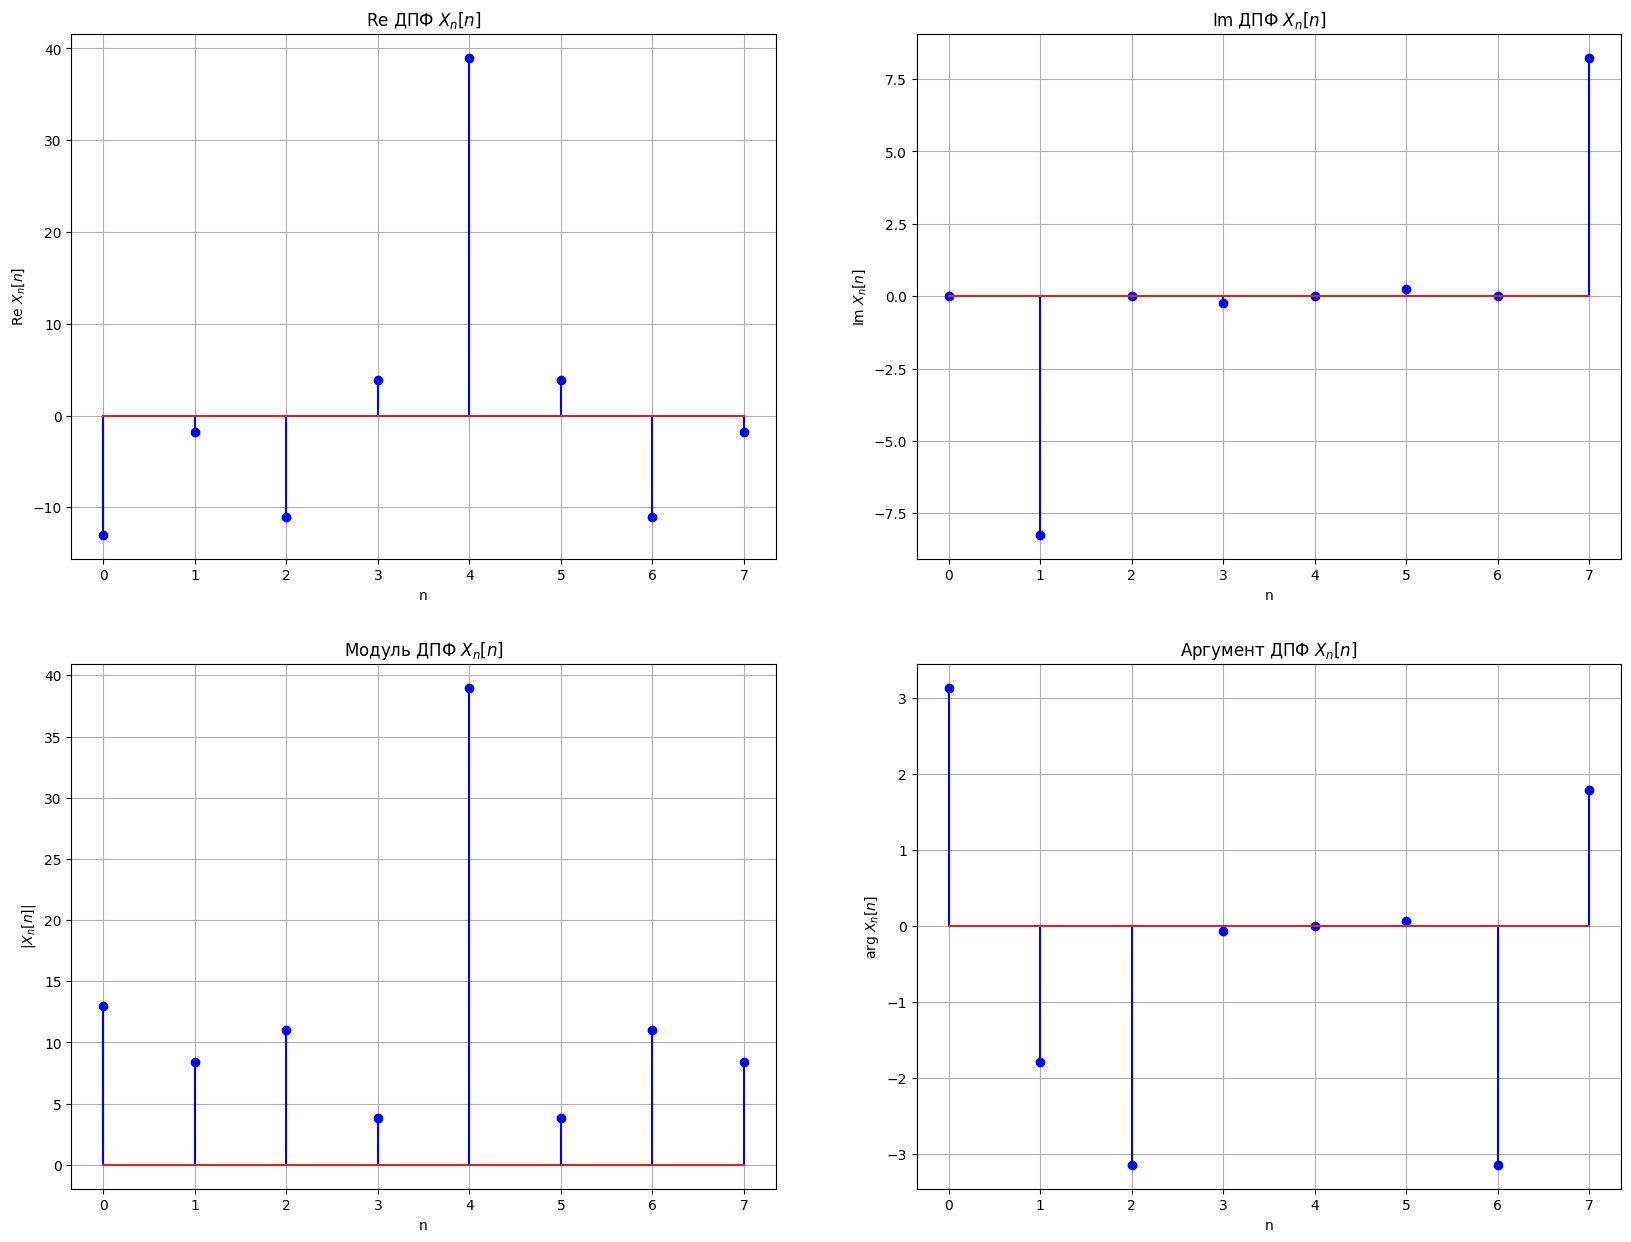

In [ ]:
plt.figure(figsize=(20, 15))

# реальная часть
real_X_n = np.array([X_n[i].real for i in range(N)])
# мнимая часть
img_X_n = np.array([X_n[i].imag for i in range(N)])
# модуль
abs_X_n = np.array([abs(X_n[i]) for i in range(N)])
# аргумент
angle_X_n = np.angle(X_n)

plt.subplot(2,2,1)
plt.stem(n, real_X_n, linefmt='b', markerfmt='bo')

plt.title(r'Re ДПФ $X_n[n]$')
plt.xlabel('n')
plt.ylabel(r'Re $X_n[n]$')
plt.grid()

plt.subplot(2,2,2)
plt.stem(n, img_X_n, linefmt='b', markerfmt='bo')

plt.title(r'Im ДПФ $X_n[n]$')
plt.xlabel('n')
plt.ylabel(r'Im $X_n[n]$')
plt.grid()

plt.subplot(2,2,3)
plt.stem(n, abs_X_n, linefmt='b', markerfmt='bo')
plt.title(r'Модуль ДПФ $X_n[n]$')
plt.xlabel('n')
plt.ylabel(r'$|X_n[n]|$')
plt.grid()

plt.subplot(2,2,4)
plt.stem(n, angle_X_n, linefmt='b', markerfmt='bo')
plt.title(r'Аргумент ДПФ $X_n[n]$')
plt.xlabel('n')
plt.ylabel(r'arg $X_n[n]$')
plt.grid()

#### ДПФ, полученное быстрым преобразованием

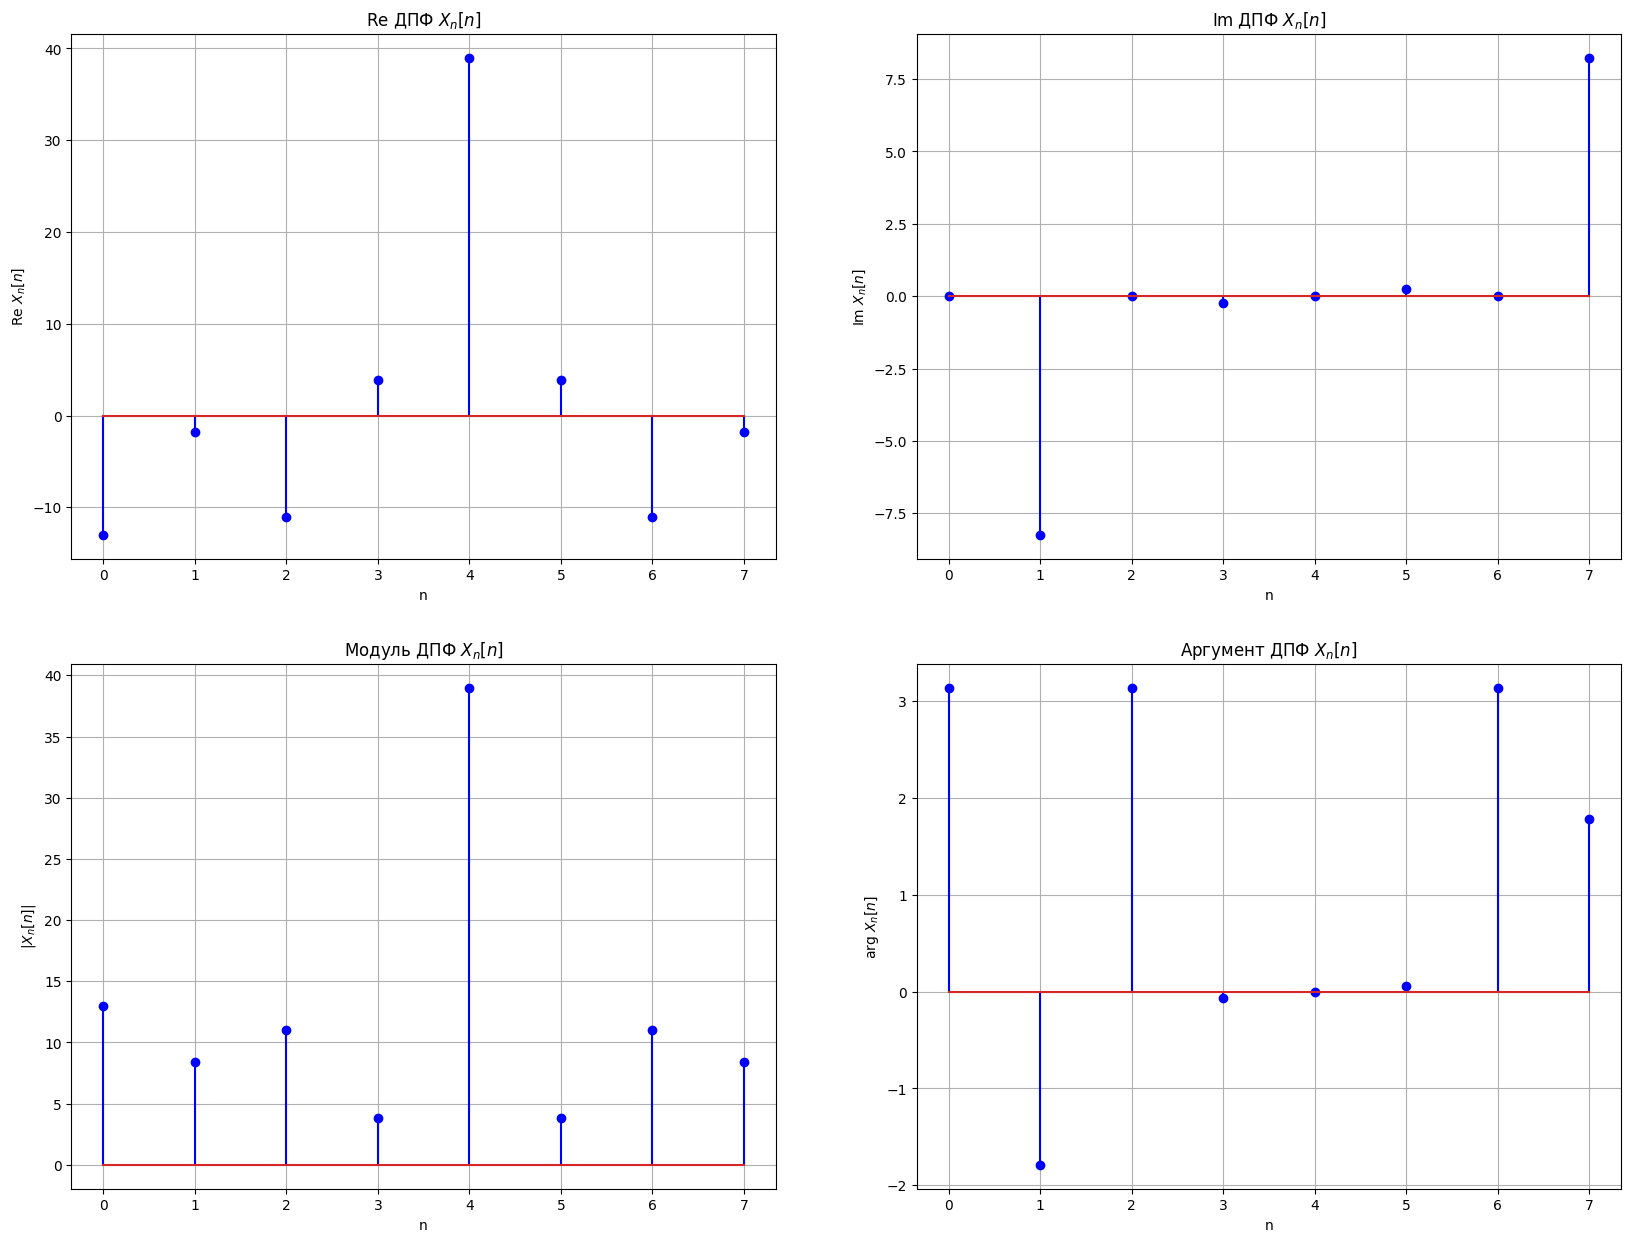

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming n and x_k are defined somewhere before this code
n = np.arange(len(x_k))

plt.figure(figsize=(20, 15))

plt.subplot(2, 2, 1)
plt.stem(n, np.fft.fft(x_k).real, 'b')
plt.title(r'Re ДПФ $X_n[n]$')
plt.xlabel('n')
plt.ylabel(r'Re $X_n[n]$')
plt.grid()

plt.subplot(2, 2, 2)
plt.stem(n, np.fft.fft(x_k).imag, 'b')
plt.title(r'Im ДПФ $X_n[n]$')
plt.xlabel('n')
plt.ylabel(r'Im $X_n[n]$')
plt.grid()

plt.subplot(2, 2, 3)
plt.stem(n, np.abs(np.fft.fft(x_k)), 'b')
plt.title(r'Модуль ДПФ $X_n[n]$')
plt.xlabel('n')
plt.ylabel(r'$|X_n[n]|$')
plt.grid()

plt.subplot(2, 2, 4)
plt.stem(n, np.angle(np.fft.fft(x_k)), 'b')
plt.title(r'Аргумент ДПФ $X_n[n]$')
plt.xlabel('n')
plt.ylabel(r'arg $X_n[n]$')
plt.grid()

plt.show()


Сравнивая дискретные спектры последовательности, полученные матричным способом и библиотечной функцийе
быстрого преобразования, видим, что они совпадают.

#### Свойства симметрии ДПФ

Для действительной последовательности $x[k]$: $x[k] = x^*[k]$ справедливо свойство симметрии: $x[k] \stackrel{DTF}{\leftrightarrow} X^*[N-n]$ или $X[n] = X^*[N-n]$.

То есть, если $X[n]$ ДПФ последовательности $x[k]$, то для $Re X[n]$ и $|X[n]|$ выполняется симметрия, для
$Im X[n]$ и $arg X[n]$ выполняется антисимметрия.

Если посмотреть на выведенные ранее графики, можно пронаблюдать это свойство. Проверим так же его програмно.

In [ ]:
eps=1e-6

print('='*50)
# attention: comparation of float
for i in range(1, N):
    if (real_X_n[i] - real_X_n[N-i]) < eps:
        print('Re X[n] = Re X[N-n] = %0.2f' %real_X_n[i])
    else:
        print('Oooops, something goes wrong!')
print('='*50)
for i in range(1, N):
    if (abs_X_n[i] - abs_X_n[N-i]) < eps:
        print('|X[n]| = |X[N-n]| = %0.2f' %abs_X_n[i])
    else:
        print('Oooops, something goes wrong!')
print('='*50)
for i in range(1, N):
    if (img_X_n[i] + img_X_n[N-i]) < eps:
        print('Im X[n] = - Im X[N-n] = %0.2f' %img_X_n[i])
    else:
        print('Oooops, something goes wrong!')
print('='*50)
for i in range(1, N):
    if (angle_X_n[i] + angle_X_n[N-i]) < eps:
        print('arg(X[n]) = -arg(X[N-n]) = %0.2f' %angle_X_n[i])
    else:
        print('Oooops, something goes wrong!')

Re X[n] = Re X[N-n] = -1.83
Re X[n] = Re X[N-n] = -11.00
Re X[n] = Re X[N-n] = 3.83
Re X[n] = Re X[N-n] = 39.00
Re X[n] = Re X[N-n] = 3.83
Re X[n] = Re X[N-n] = -11.00
Re X[n] = Re X[N-n] = -1.83
|X[n]| = |X[N-n]| = 8.44
|X[n]| = |X[N-n]| = 11.00
|X[n]| = |X[N-n]| = 3.84
|X[n]| = |X[N-n]| = 39.00
|X[n]| = |X[N-n]| = 3.84
|X[n]| = |X[N-n]| = 11.00
|X[n]| = |X[N-n]| = 8.44
Im X[n] = - Im X[N-n] = -8.24
Im X[n] = - Im X[N-n] = -0.00
Im X[n] = - Im X[N-n] = -0.24
Im X[n] = - Im X[N-n] = 0.00
Im X[n] = - Im X[N-n] = 0.24
Im X[n] = - Im X[N-n] = -0.00
Im X[n] = - Im X[N-n] = 8.24
arg(X[n]) = -arg(X[N-n]) = -1.79
arg(X[n]) = -arg(X[N-n]) = -3.14
arg(X[n]) = -arg(X[N-n]) = -0.06
arg(X[n]) = -arg(X[N-n]) = 0.00
arg(X[n]) = -arg(X[N-n]) = 0.06
arg(X[n]) = -arg(X[N-n]) = -3.14
arg(X[n]) = -arg(X[N-n]) = 1.79


## Task 2.3

Рассмотрим дискретный спектр
$$Y[n] = \exp \left(-j \frac{2 \pi}{N} n m \right) X[n]$$
$$Y[n] = \sum\limits_{k=0}^{N-1} x[k] \exp \left(-j \frac{2 \pi}{N} n k \right) \exp \left(-j \frac{2 \pi}{N} n m \right)$$
$$Y[n] = \sum\limits_{k=0}^{N-1} x[k] \exp \left(-j \frac{2 \pi}{N} n (k+m) \right)$$

Сделав замену $k$ получаем, что сигнал, спектр которого представляется данной последовательностью отсчетов, есть $x[k]$, сдвинутые
на $m$ отсчетов.

In [ ]:
Y = np.exp(-1j * 2*math.pi / N * m * n) * X_n
y = ifft(Y)
k = np.array(range(8))

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


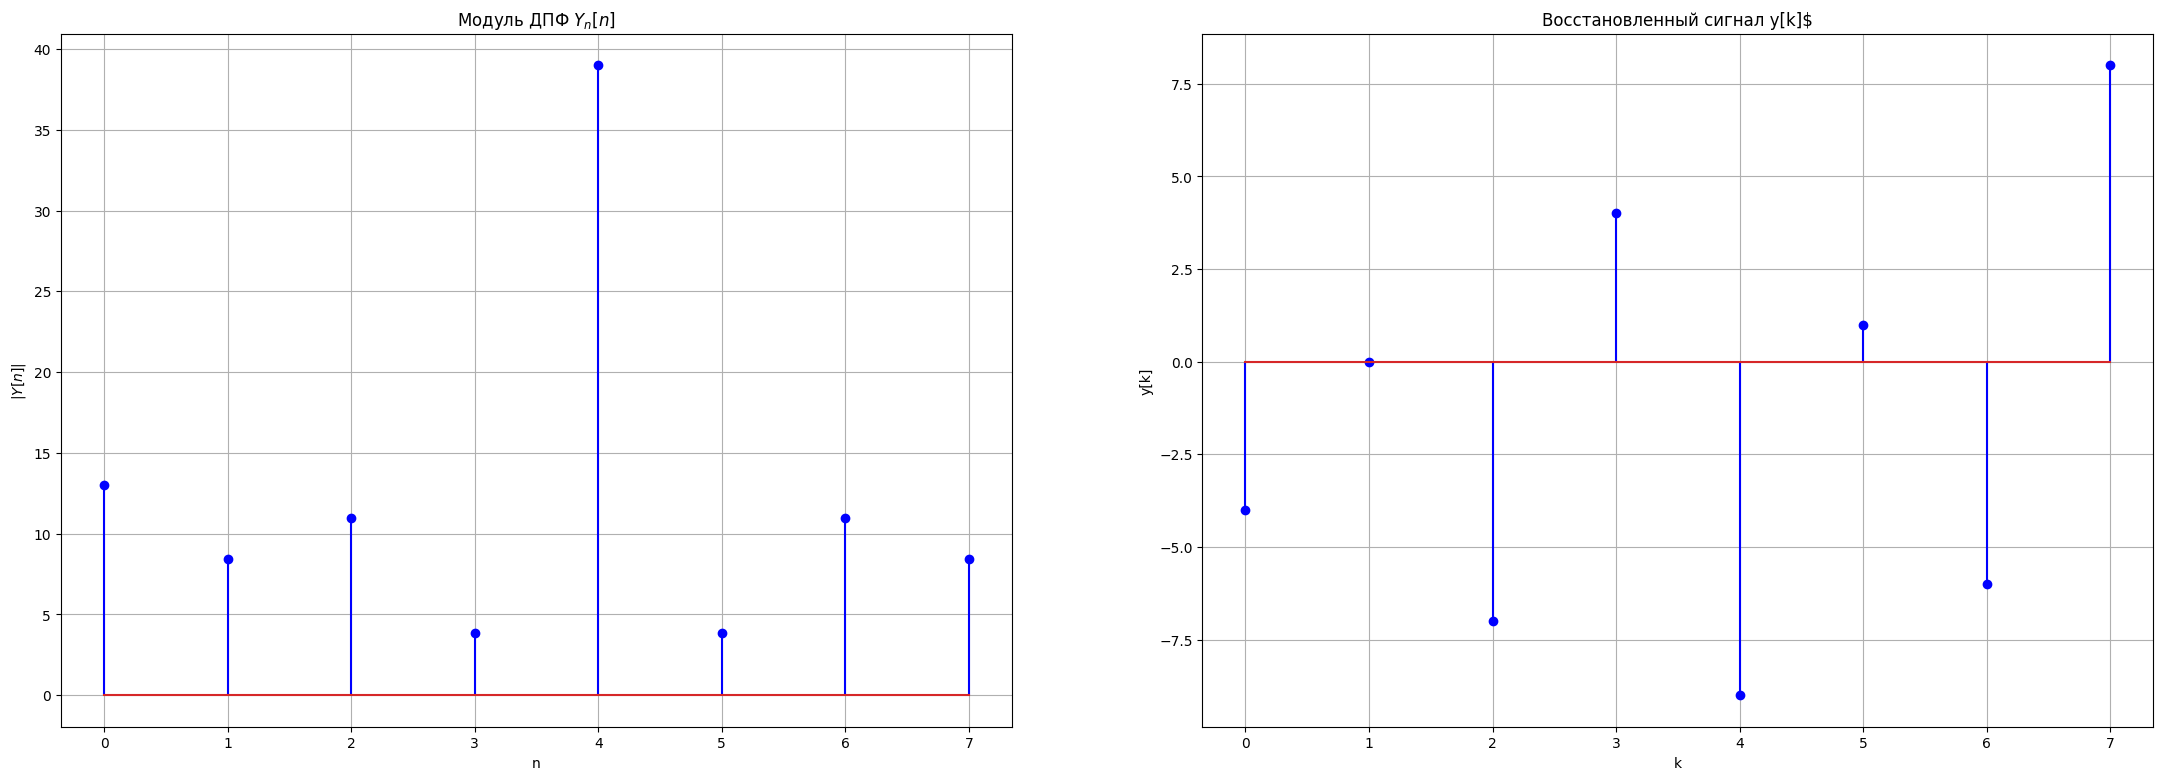

In [ ]:
plt.figure(figsize=(27, 9))

plt.subplot(1,2,1)
plt.stem(n, abs(Y), 'b', markerfmt='bo')
plt.title(r'Модуль ДПФ $Y_n[n]$')
plt.xlabel('n')
plt.ylabel(r'$|Y[n]|$')
plt.grid()

plt.subplot(1,2,2)
plt.stem(k, y, 'b', markerfmt='bo')

plt.title(r'Восстановленный сигнал y[k]$')
plt.xlabel('k')
plt.ylabel(r'y[k]')
plt.grid()

Сравним сигналы $x[k]$ и $y[k]$

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


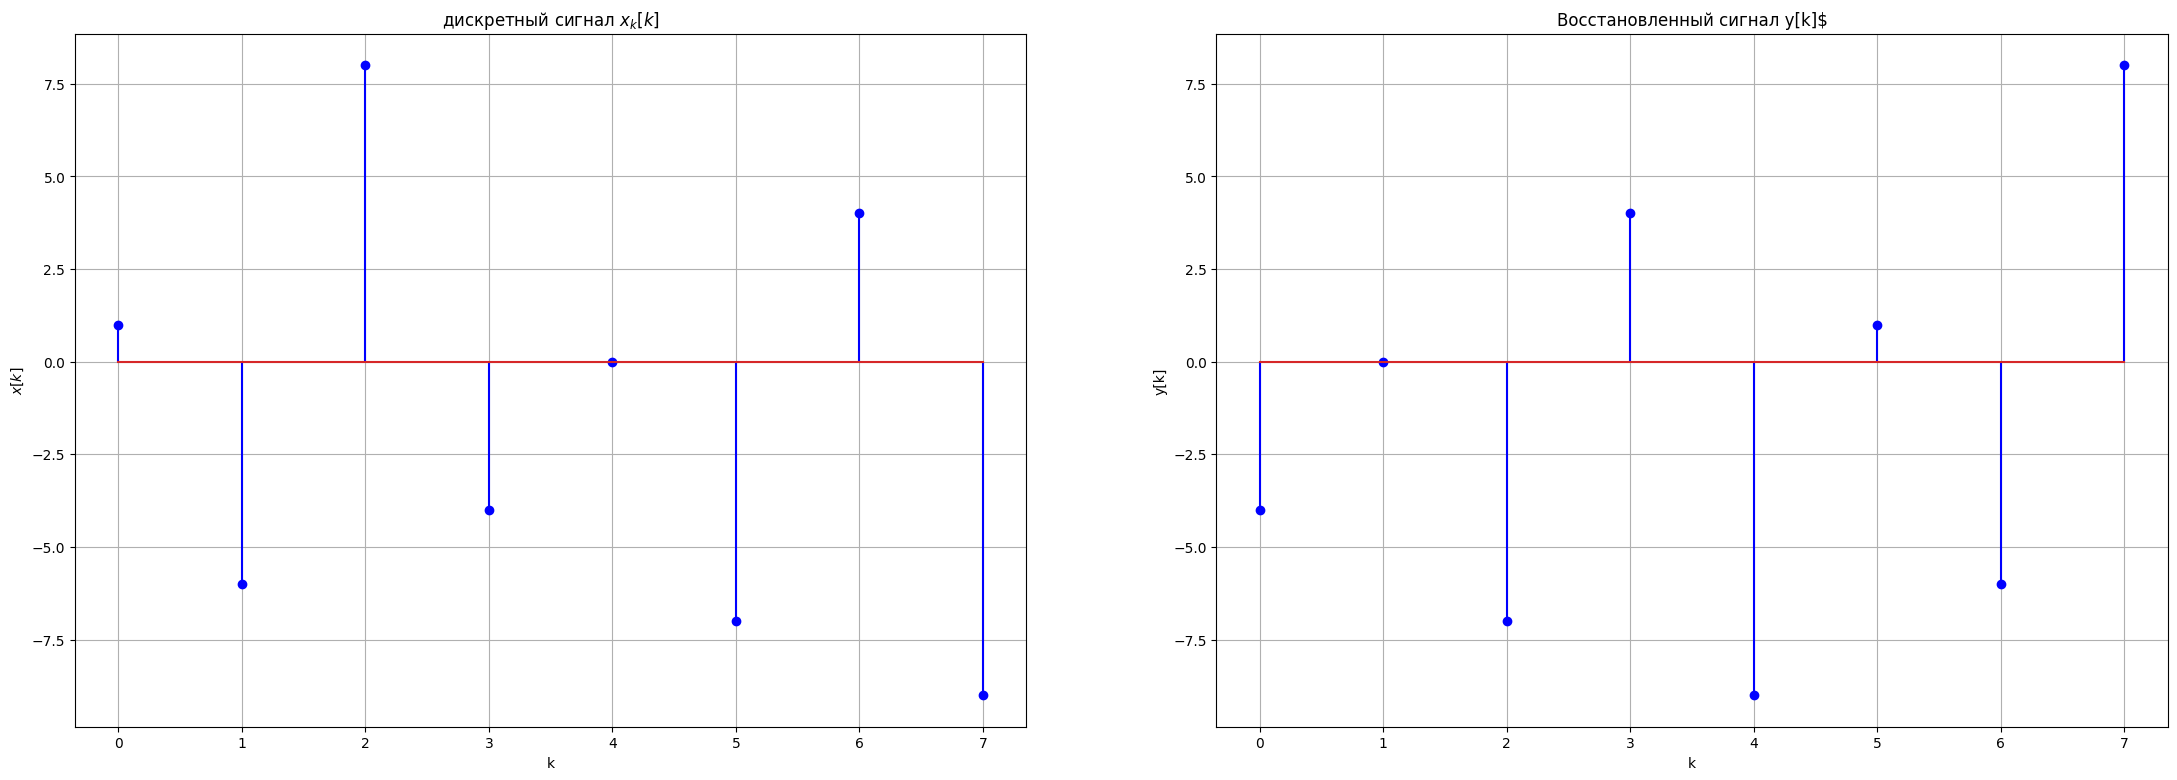

In [ ]:
plt.figure(figsize=(27, 9))

plt.subplot(1,2,1)
plt.stem(k, x_k, 'b', markerfmt='bo')

plt.title(r'дискретный сигнал $x_k[k]$')
plt.xlabel('k')
plt.ylabel(r'$x[k]$')
plt.grid()

plt.subplot(1,2,2)
plt.stem(k, y, 'b', markerfmt='bo')
plt.title(r'Восстановленный сигнал y[k]$')
plt.xlabel('k')
plt.ylabel(r'y[k]')
plt.grid()

Видно, что новый сигнал $y[k]$ можно получить из сигнала $x[k]$ циклическим сдвигом на $m$ отсчетов влево ($m < 0$).